sns.pairplot(data)### 100,000 UK Used Car Data set
https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes


1. Выбрать набор данных для своей группы: <br>
    3530203_70101: Audi <br>
    3530203_70102: BMW <br>
    3530903_70301: Ford <br>
    3530903_70302: Mercedes<br>
    
2. Разбить данные на тренировочные и тестовые (70% на 30%, random_state=10).
3. Попытаться обучить регрессии c лучшим качеством. 


In [401]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from xgboost import XGBRegressor
# Регуляризация: Ridge - квадраты весов ограничиваются коэффициентом, Lasso - модуль весов
# Можно задать параметр альфа, управляющий силой регуляризации
# LassoCV и RidgeCV используют кросс-валидацию и подбирают значения коэффициента
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [418]:
auto_data = pd.read_csv("audi.csv")
# miles per gallon (MPG) - расход топлива
# engineSize - объем двигателя
# предсказываем цену

auto_data = auto_data.reindex(columns=['price', 'model', 'year', 'transmission','mileage', 'fuelType','tax', 'mpg','engineSize'])
# auto_data

In [3]:
auto_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [4]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


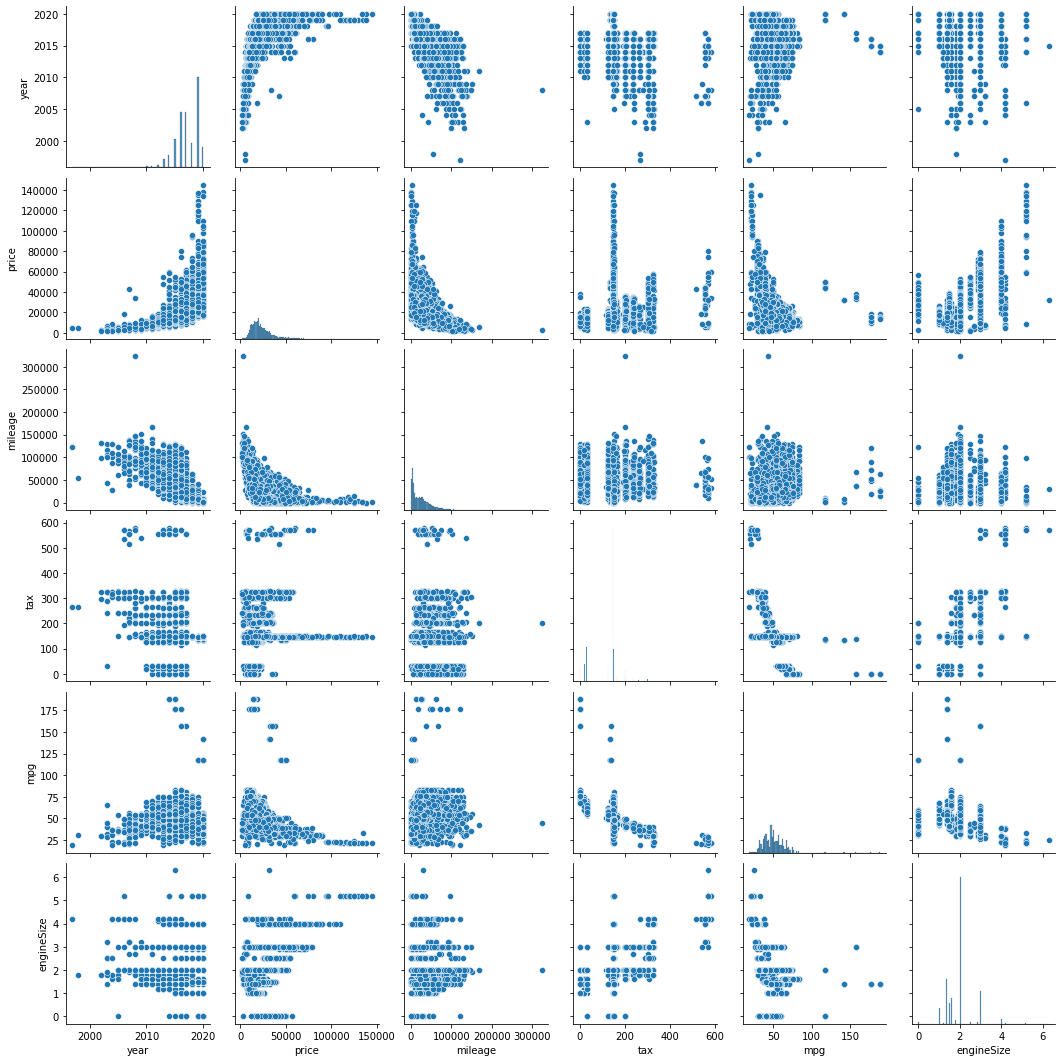

In [5]:
sns.pairplot(auto_data)

<AxesSubplot:>

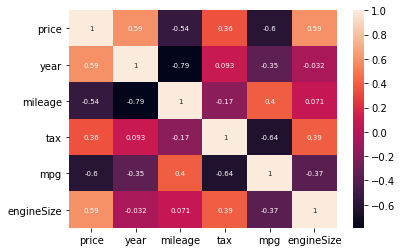

In [177]:
corr_matrix = auto_data.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":7})

 A3     0.180821
 Q3     0.132827
 A4     0.129453
 A1     0.126265
 A5     0.082677
 Q5     0.082208
 Q2     0.077053
 A6     0.070116
 Q7     0.037214
 TT     0.031496
 A7     0.011436
 A8     0.011061
 Q8     0.006468
 RS6    0.003656
 RS3    0.003093
 RS4    0.002906
 RS5    0.002718
 R8     0.002625
 S3     0.001687
 SQ5    0.001500
 S4     0.001125
 SQ7    0.000750
 S8     0.000375
 S5     0.000281
 RS7    0.000094
 A2     0.000094
Name: model, dtype: float64


<AxesSubplot:xlabel='count', ylabel='model'>

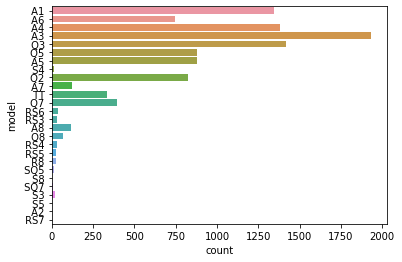

In [188]:
print(auto_data["model"].value_counts() / len(auto_data))
sns.countplot(y = auto_data["model"])

In [408]:
auto_data = pd.get_dummies(auto_data)
auto_data

,price,year,mileage,tax,mpg,engineSize,model_ A1,model_ A2,model_ A3,model_ A4,...,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,12500,2017,15735,150,55.4,1.4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,16500,2016,36203,20,64.2,2.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,11000,2016,29946,30,55.4,1.4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,16800,2017,25952,145,67.3,2.0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,17300,2019,1998,145,49.6,1.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10663,16999,2020,4018,145,49.6,1.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
10664,16999,2020,1978,150,49.6,1.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
10665,17199,2020,609,150,49.6,1.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
10666,19499,2017,8646,150,47.9,1.4,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [419]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

categorical_columns = auto_data.columns[auto_data.dtypes == 'object']
le = LabelEncoder()
for col in categorical_columns:
    auto_data[col] = le.fit_transform(auto_data[col])
auto_data

,price,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,12500,0,2017,1,15735,2,150,55.4,1.4
1,16500,5,2016,0,36203,0,20,64.2,2.0
2,11000,0,2016,1,29946,2,30,55.4,1.4
3,16800,3,2017,0,25952,0,145,67.3,2.0
4,17300,2,2019,1,1998,2,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,16999,2,2020,1,4018,2,145,49.6,1.0
10664,16999,2,2020,1,1978,2,150,49.6,1.0
10665,17199,2,2020,1,609,2,150,49.6,1.0
10666,19499,9,2017,0,8646,2,150,47.9,1.4


In [420]:
X, Y = auto_data.drop(['price'], axis=1), auto_data['price']

In [421]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [405]:
X_train.shape

(7467, 37)

In [193]:
X_test.shape

(3201, 37)

In [14]:
Y_train.shape[0]

7467

In [15]:
Y_test.shape[0]

3201

In [353]:
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

## LinearRegression

In [354]:
simple_LR = LinearRegression()
simple_LR.fit(X_train_scaled, Y_train)

LinearRegression()

In [355]:
# One-Hot encoding
simple_LR_predictions = simple_LR.predict(X_test_scaled)
simple_LR_rmse = metrics.mean_squared_error(Y_test, simple_LR_predictions, squared=False) #Измерение ошибки
print(f'RMSE = {round(simple_LR_rmse, 3)}')

RMSE = 1018292034157705.5


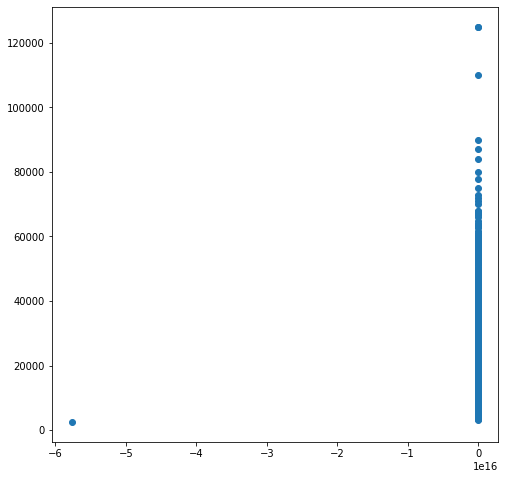

In [356]:
# One-Hot encoding
plt.figure(figsize=(8, 8))
plt.scatter(simple_LR_predictions, Y_test)

In [357]:
# One-Hot encoding
pd.DataFrame(simple_LR.coef_, auto_data.columns[1:], columns=['Coefficients'])

,Coefficients
year,4.003831e+03
mileage,-1.880315e+03
tax,-1.864299e+03
mpg,-3.471426e+03
engineSize,2.844881e+03
model_ A1,1.956666e+16
model_ A2,1.053792e+15
model_ A3,2.249903e+16
model_ A4,1.968882e+16
model_ A5,1.602031e+16


In [267]:
# Label Encoding
simple_LR_predictions = simple_LR.predict(X_test_scaled)
simple_LR_rmse = metrics.mean_squared_error(Y_test, simple_LR_predictions, squared=False) #Измерение ошибки
print(f'RMSE = {round(simple_LR_rmse, 3)}')

RMSE = 5215.371


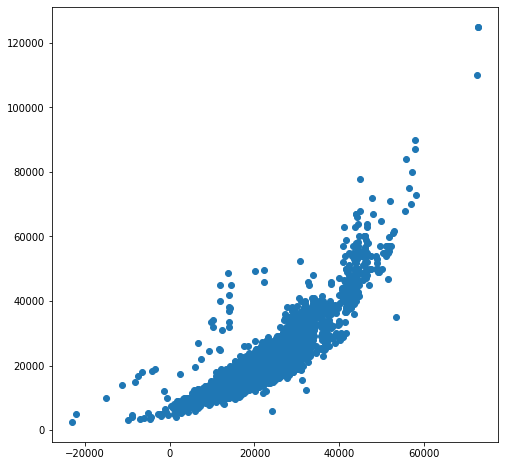

In [268]:
# Label Encoding
plt.figure(figsize=(8, 8))
plt.scatter(simple_LR_predictions, Y_test)

In [269]:
# Label Encoding
pd.DataFrame(simple_LR.coef_, auto_data.columns[1:], columns=['Coefficients'])

,Coefficients
model,1380.643349
year,4685.844468
transmission,-129.141361
mileage,-2239.015798
fuelType,597.574476
tax,-1223.865100
mpg,-2028.518507
engineSize,6796.366525


In [358]:
# One-Hot encoding
simple_LR.score(X_test_scaled, Y_test)

-7.994965307174847e+21

In [270]:
# Label encoding
simple_LR.score(X_test_scaled, Y_test)

0.7902788004224374

## Lasso

In [359]:
model = Lasso(random_state=10, max_iter=10000)
model.fit(X_train_scaled, Y_train)

Lasso(max_iter=10000, random_state=10)

In [360]:
# One-Hot encoding
model_predictions = model.predict(X_test_scaled)
model_rmse = metrics.mean_squared_error(Y_test, model_predictions, squared=False) #Измерение ошибки
print(f'RMSE = {round(model_rmse, 3)}')

RMSE = 3686.425


In [361]:
# One-Hot encoding
pd.DataFrame(model.coef_, auto_data.columns[1:], columns=['Coefficients'])

,Coefficients
year,4004.627158
mileage,-1883.838351
tax,-1886.088648
mpg,-3495.376281
engineSize,2840.801957
model_ A1,-969.410616
model_ A2,0.000000
model_ A3,-598.295621
model_ A4,-469.633487
model_ A5,-2.508525


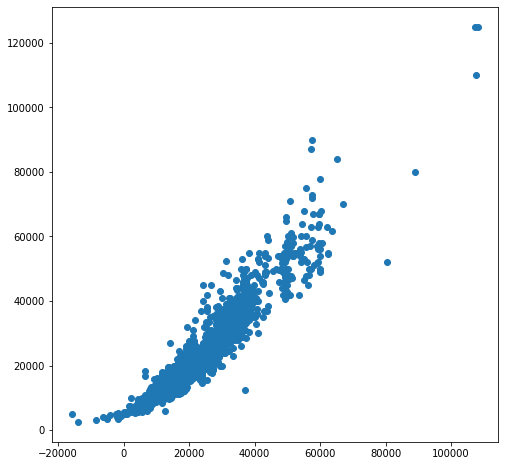

In [362]:
# One-Hot encoding
plt.figure(figsize=(8, 8))
plt.scatter(model_predictions, Y_test)

In [300]:
# Label encoding
model_predictions = model.predict(X_test_scaled)
model_rmse = metrics.mean_squared_error(Y_test, model_predictions, squared=False) #Измерение ошибки
print(f'RMSE = {round(model_rmse, 3)}')

RMSE = 5215.21


In [301]:
# Label encoding
pd.DataFrame(model.coef_, auto_data.columns[1:], columns=['Coefficients'])

,Coefficients
model,1379.531709
year,4685.709819
transmission,-127.977957
mileage,-2238.305715
fuelType,595.737224
tax,-1220.646631
mpg,-2027.634078
engineSize,6794.121976


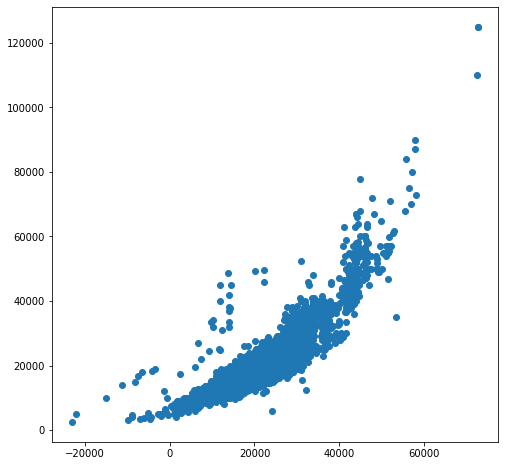

In [302]:
# Label encoding
plt.figure(figsize=(8, 8))
plt.scatter(model_predictions, Y_test)

In [363]:
# One-Hot encoding
model.score(X_test_scaled, Y_test)

0.895218980747642

In [303]:
# Label encoding
model.score(X_test_scaled, Y_test)

0.7902917443198125

## Ridge

In [364]:
modelRidge = Ridge()
modelRidge.fit(X_train_scaled, Y_train)

Ridge()

In [365]:
# One-Hot encoding
modelRidge_predictions = modelRidge.predict(X_test_scaled)
modelRidge_rmse = metrics.mean_squared_error(Y_test, modelRidge_predictions, squared=False) #Измерение ошибки
print(f'RMSE = {round(modelRidge_rmse, 3)}')

RMSE = 3685.271


In [366]:
# One-Hot encoding
pd.DataFrame(modelRidge.coef_, auto_data.columns[1:], columns=['Coefficients'])

,Coefficients
year,4002.947883
mileage,-1885.211613
tax,-1889.598959
mpg,-3499.095722
engineSize,2834.649078
model_ A1,-1193.244883
model_ A2,0.000000
model_ A3,-854.955529
model_ A4,-693.270052
model_ A5,-184.541805


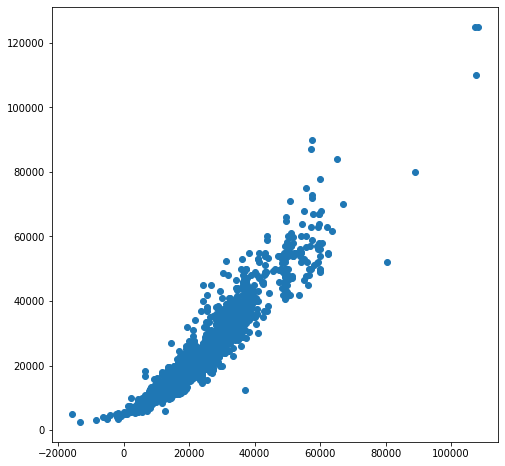

In [367]:
# One-hot encoding
plt.figure(figsize=(8, 8))
plt.scatter(modelRidge_predictions, Y_test)

In [328]:
# Label encoding
modelRidge_predictions = modelRidge.predict(X_test_scaled)
modelRidge_rmse = metrics.mean_squared_error(Y_test, modelRidge_predictions, squared=False) #Измерение ошибки
print(f'RMSE = {round(modelRidge_rmse, 3)}')

RMSE = 5215.231


In [329]:
# Label encoding
pd.DataFrame(modelRidge.coef_, auto_data.columns[1:], columns=['Coefficients'])

,Coefficients
model,1380.620641
year,4684.795764
transmission,-129.064209
mileage,-2239.390770
fuelType,596.750683
tax,-1223.171199
mpg,-2028.886672
engineSize,6794.741245


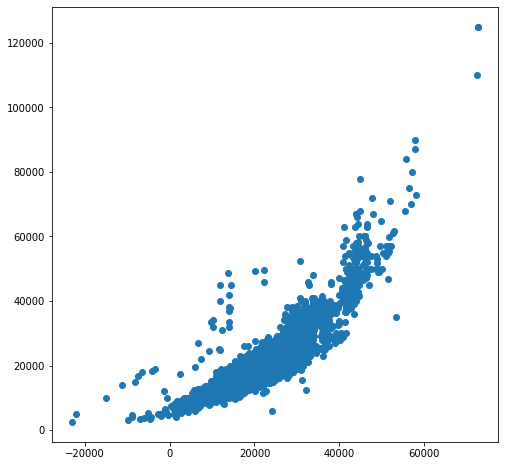

In [330]:
# Label encoding
plt.figure(figsize=(8, 8))
plt.scatter(modelRidge_predictions, Y_test)

In [368]:
# One-Hot encoding
modelRidge.score(X_test_scaled, Y_test)

0.8952845602572117

In [331]:
# Label encoding
modelRidge.score(X_test_scaled, Y_test)

0.7902901063679116

## RidgeCV

In [369]:
modelRidgecv = RidgeCV()
modelRidgecv.fit(X_train_scaled, Y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [370]:
# One-hot encoding
modelRidgecv_predictions = modelRidgecv.predict(X_test_scaled)
modelRidgecv_rmse = metrics.mean_squared_error(Y_test, modelRidgecv_predictions, squared=False) #Измерение ошибки
print(f'RMSE = {round(modelRidgecv_rmse, 3)}')

RMSE = 3685.716


In [371]:
# One-hot encoding
pd.DataFrame(modelRidgecv.coef_, auto_data.columns[1:], columns=['Coefficients'])

,Coefficients
year,3997.545603
mileage,-1890.193764
tax,-1878.700566
mpg,-3483.165923
engineSize,2837.463878
model_ A1,-1192.529622
model_ A2,0.000000
model_ A3,-854.225111
model_ A4,-692.760169
model_ A5,-185.043169


In [333]:
# Label encoding
modelRidgecv_predictions = modelRidgecv.predict(X_test_scaled)
modelRidgecv_rmse = metrics.mean_squared_error(Y_test, modelRidgecv_predictions, squared=False) #Измерение ошибки
print(f'RMSE = {round(modelRidgecv_rmse, 3)}')

RMSE = 5213.988


In [334]:
# Label encoding
pd.DataFrame(modelRidgecv.coef_, auto_data.columns[1:], columns=['Coefficients'])

,Coefficients
model,1380.417395
year,4675.407224
transmission,-128.373537
mileage,-2242.728707
fuelType,589.378374
tax,-1216.937056
mpg,-2032.168362
engineSize,6780.163443


In [372]:
# One-hot
modelRidgecv.score(X_test_scaled, Y_test)

0.8952592399401976

In [335]:
# Label
modelRidgecv.score(X_test_scaled, Y_test)

0.7903900633124294

## LassoCV

In [374]:
modelLassocv = LassoCV()
modelLassocv.fit(X_train_scaled, Y_train)

LassoCV()

In [375]:
# One-Hot encoding
modelLassocv_predictions = modelLassocv.predict(X_test_scaled)
modelLassocv_rmse = metrics.mean_squared_error(Y_test, modelLassocv_predictions, squared=False) #Измерение ошибки
print(f'RMSE = {round(modelLassocv_rmse, 3)}')

RMSE = 3688.398


In [337]:
# Label encoding
modelRidgecv_predictions = modelRidgecv.predict(X_test_scaled)
modelRidgecv_rmse = metrics.mean_squared_error(Y_test, modelRidgecv_predictions, squared=False) #Измерение ошибки
print(f'RMSE = {round(modelRidgecv_rmse, 3)}')

RMSE = 5213.988


## LassoCV с alphas

In [376]:
alphas = np.linspace(1, 10, 100)
alphas

array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3.27272727,  3.36363636,  3.45454545,  3.54545455,  3.63636364,
        3.72727273,  3.81818182,  3.90909091,  4.        ,  4.09090909,
        4.18181818,  4.27272727,  4.36363636,  4.45454545,  4.54545455,
        4.63636364,  4.72727273,  4.81818182,  4.90909091,  5.        ,
        5.09090909,  5.18181818,  5.27272727,  5.36363636,  5.45454545,
        5.54545455,  5.63636364,  5.72727273,  5.81818182,  5.90909091,
        6.        ,  6.09090909,  6.18181818,  6.27272727,  6.36363636,
        6.45454545,  6.54545455,  6.63636364,  6.72727273,  6.81818182,
        6.90909091,  7.        ,  7.09090909,  7.18181818,  7.27

In [377]:
# One-Hot encoding
model = LassoCV(alphas=alphas, max_iter=10000)
model.fit(X_train_scaled, Y_train)
model_predictions = model.predict(X_test_scaled)
model_rmse = metrics.mean_squared_error(Y_test, model_predictions, squared=False) #Измерение ошибки
print(f'RMSE = {round(model_rmse, 3)}')

RMSE = 3686.425


In [338]:
# Label encoding
model = LassoCV(alphas=alphas, max_iter=10000)
model.fit(X_train_scaled, Y_train)
model_predictions = model.predict(X_test_scaled)
model_rmse = metrics.mean_squared_error(Y_test, model_predictions, squared=False) #Измерение ошибки
print(f'RMSE = {round(model_rmse, 3)}')

RMSE = 5214.366


## Случайный лес

In [378]:
model = RandomForestRegressor(random_state = 10, n_estimators = 100)

In [379]:
# One-hot encoding
model = RandomForestRegressor(random_state = 10, n_estimators = 100)
model.fit(X_train, Y_train)
model_predictions = model.predict(X_test)

model_rmse = metrics.mean_squared_error(Y_test, model_predictions, squared=False) #Измерение ошибки
print(f'RMSE = {round(model_rmse, 3)}')

RMSE = 2279.044


In [380]:
# One-hot encoding
pd.DataFrame(model.feature_importances_, auto_data.columns[1:], columns=['Importance'])

,Importance
year,0.213449
mileage,0.051249
tax,0.019374
mpg,0.444886
engineSize,0.171782
model_ A1,0.006168
model_ A2,0.000000
model_ A3,0.002001
model_ A4,0.003671
model_ A5,0.001043


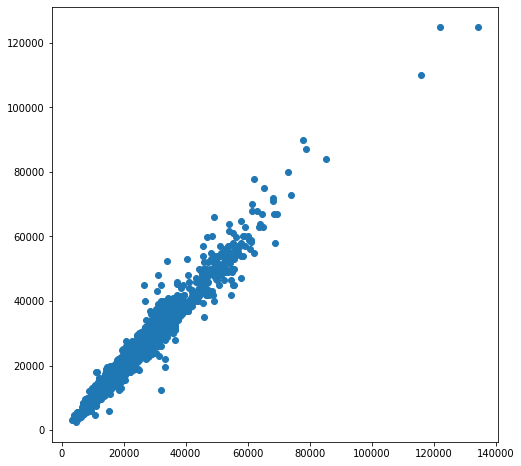

In [381]:
# One-hot encoding
plt.figure(figsize=(8, 8))
plt.scatter(predictions, Y_test)

In [341]:
# Label encoding
model = RandomForestRegressor(random_state = 10, n_estimators = 100)
model.fit(X_train, Y_train)
model_predictions = model.predict(X_test)

model_rmse = metrics.mean_squared_error(Y_test, model_predictions, squared=False) #Измерение ошибки
print(f'RMSE = {round(model_rmse, 3)}')

RMSE = 2274.573


In [343]:
# Label encoding
pd.DataFrame(model.feature_importances_, auto_data.columns[1:], columns=['Importance'])

,Importance
model,0.058530
year,0.221071
transmission,0.005310
mileage,0.051023
fuelType,0.006196
tax,0.033410
mpg,0.438803
engineSize,0.185657


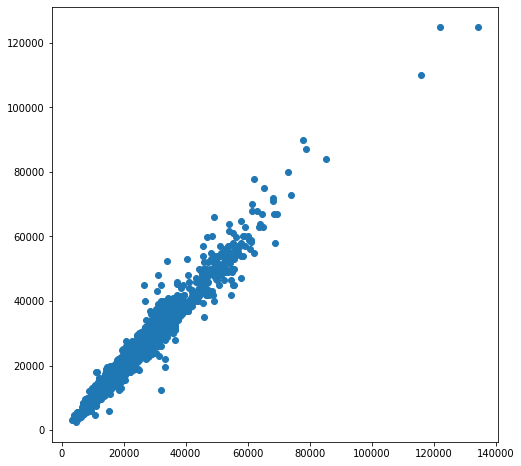

In [344]:
# Label encoding
plt.figure(figsize=(8, 8))
plt.scatter(predictions, Y_test)

In [382]:
# One-hot encoding
model.score(X_test, Y_test)

0.9599523314993386

In [348]:
# Label encoding
model.score(X_test, Y_test)

0.9601093038491492

Модель, построенная на методе RandomForest, лучше предсказывает работает на тестовых данных, чем построенная на классическом LinearRegression и методах с регуляризацией Ridge и Lasso (даже с кросс-валидацией). One-hot кодирование лучше использовать с методами Lasso, Ridge, а label кодирование - с RandomForest.